In [4]:
import pandas as pd
import numpy as np

df=pd.DataFrame({'uname':['a','b','c','d','e'],'cgpa':[6.8,5.9,5.3,7.9,5.8],'iq':[121,106,132,126,131],'placement':[1,0,1,0,1]})

In [5]:
df

,uname,cgpa,iq,placement
0,a,6.8,121,1
1,b,5.9,106,0
2,c,5.3,132,1
3,d,7.9,126,0
4,e,5.8,131,1


In [6]:
preprocess:
duplicate,null,unwanted columns removal

SyntaxError: invalid syntax (1483921116.py, line 1)

In [ ]:
df.info()

In [7]:
df.isnull().sum()

uname        0
cgpa         0
iq           0
placement    0
dtype: int64

In [8]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [9]:
df.drop('uname',axis=1,inplace=True)

In [10]:
df

,cgpa,iq,placement
0,6.8,121,1
1,5.9,106,0
2,5.3,132,1
3,7.9,126,0
4,5.8,131,1


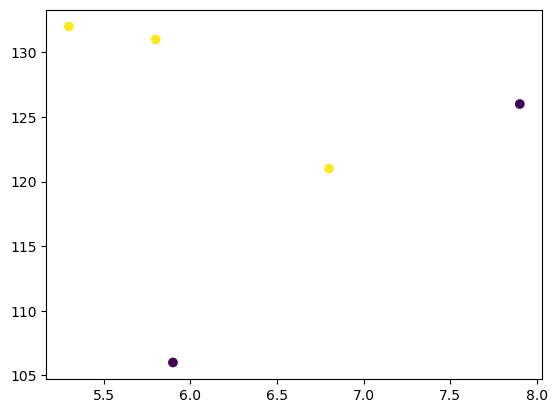

In [11]:
#EDA
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
x=df.iloc[:,0:2]


In [13]:
y=df.iloc[:,-1]

In [14]:
x

,cgpa,iq
0,6.8,121
1,5.9,106
2,5.3,132
3,7.9,126
4,5.8,131


In [15]:
y

0    1
1    0
2    1
3    0
4    1
Name: placement, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)                                                                                                                                 

In [19]:
x_train

,cgpa,iq
3,7.9,126
2,5.3,132
0,6.8,121
1,5.9,106


In [20]:
y_train

3    0
2    1
0    1
1    0
Name: placement, dtype: int64

In [21]:
x_test

,cgpa,iq
4,5.8,131


In [22]:
y_test

4    1
Name: placement, dtype: int64

In [ ]:
scaling the data to minimize range varation between data.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)

In [27]:
x_train

array([[ 1.45296631,  0.49338169],
       [-1.19805994,  1.11660066],
       [ 0.33137828, -0.02596746],
       [-0.58628465, -1.58401489]])

In [28]:
x_test=scaler.transform(x_test)

In [29]:
x_test

array([[-0.6882472 ,  1.01273083]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf=LogisticRegression()

In [32]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
evaluate model:
    calculate accuracy of test data

In [35]:
y_pred=clf.predict(x_test)#predicted data

In [36]:
y_test#actual data

4    1
Name: placement, dtype: int64

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

1.0

In [42]:
from mlxtend.plotting import plot_decision_regions

In [41]:

pip install mlxtend


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ------ --------------------------------- 0.2/1.4 MB 6.3 MB/s eta 0:00:01
     ---------------- ----------------------- 0.6/1.4 MB 7.0 MB/s eta 0:00:01
     -------------------------------- ------- 1.1/1.4 MB 7.8 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 8.6 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 5.7 MB/s eta 0:00:00


<Axes: >

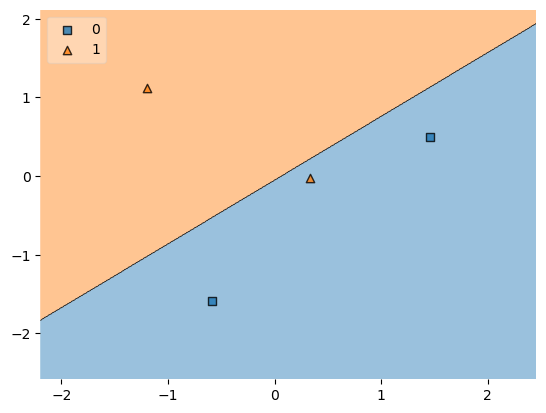

In [44]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [45]:
#deploymnt convert to binary form
#everything in python is object so here we convert the object into file model.pkl
#here we use 'wb' mode write binary mode  and pickle dump function used to convert object to file

import pickle
pickle.dump(clf,open('model.pkl','wb'))